# Hotel Churn Rate Prediction

###  Business Objective :- To predict whether the customer is going to cancel booking or not.

* **Dataset details:-**  This dataset contains booking information for a ciy hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children and/ or babies and the number of available parking spaces. 

<img src = "hotel.jpg" style = "width:400px;height:200px"/>

### Steps
1. Import Libraries
2. Import Dataset
3. Data Exploration
4. Data Preprocessing
5. EDA (Data Visualisation:- Univariate, Bivariate, Multivariate analysis)
6. Conclusion

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt     #data visualization
%matplotlib inline
import seaborn as sns 
import sidetable as stb     # create summary of tables
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [2]:
df= pd.read_csv("Bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Data Exploration

In [3]:
# check shape of data 
df.shape

(119390, 32)

We can see here 119390 Rows and 32 columns in dataset.

In [4]:
# check columns name
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
# check basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# check statistical summary of dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.describe(include = 'O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [8]:
# Check unique values 
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [9]:
# Check duplicate values
df.duplicated().any()

True

Dataset have duplicate values. So we have to remove it. 

In [10]:
# Remove duplicates
df.drop_duplicates(inplace= False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [11]:
# check is there any missing values present in dataset or not
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We can see here column name `country`, `agent`, `company` has missing values are present.

### Data pre-processing

In [12]:
# check % of missing values
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null values: {}%".format(i,round(null_rate,2)))

children null values: 0.0%
country null values: 0.41%
agent null values: 13.69%
company null values: 94.31%


In `company` column has 94% missing values. So we can drop that column.

In [13]:
df.drop('company',axis=1, inplace = True)

Now impute the missing values of the dataset.

In [14]:
df.fillna(0, inplace = True)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Now check dataset balance or not

In [16]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

Dataset is imbalance.

* babies, adults, and children can not be zero at the same time, so we will drop all the observations having zero at the same time

In [17]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,1,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,0,No Deposit,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [18]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Feature Engineering

In [19]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [20]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Transformations

In [21]:
# exclude numerical columns which are not going to contribute much
num_not = ['days_in_waiting_list', 'arrival_date_year']

In [22]:
# get numerical features
num_features = [col for col in df.columns if df[col].dtype != 'O' and col not in num_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [23]:
# exclude the categorical features that are not going to contribute much
cat_not = ['arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country', 'days_in_waiting_list']

In [24]:
# get catrgorical features
cat_features = [col for col in df.columns if df[col].dtype == 'O' and col not in cat_not]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

* **Extract Derived Features from Data**

In [25]:
df_cat = df[cat_features]
df_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [26]:
# check data types
df_cat.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [27]:
df_cat['reservation_status_date'] = pd.to_datetime(df_cat['reservation_status_date'])

In [28]:
# derived features
df_cat['year'] = df_cat['reservation_status_date'].dt.year
df_cat['month'] = df_cat['reservation_status_date'].dt.month
df_cat['day'] = df_cat['reservation_status_date'].dt.day

df_cat['cancellation'] = df['is_canceled']

In [29]:
# drop a feature because derived features already carries its information
df_cat.drop('reservation_status_date', axis=1, inplace=True) # drop vertically and update dataframe

In [30]:
df_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


In [31]:
# drop booking location column
#df_cat.drop("booking_location", axis=1, inplace=True )

#### Handling Categorical features (Mean Encoding)

In [32]:
df_cat['market_segment'].unique()


array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [33]:
# each columns except 'cancellation'
cols = df_cat.columns[0:8] 

In [34]:
# mean encoding, for example
df_cat.groupby(['hotel'])['cancellation'].mean() # it will replace the resort hotel with value '0.277674'

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64

In [35]:
#  Each categorical feature has its value which will be used by ML model
# and convert into dictionary so it can be easily mapped

for col in cols:
    print(df_cat.groupby([col])['cancellation'].mean().to_dict())
    print('\n')

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}


{'April': 0.40783534934103627, 'August': 0.37782266791717767, 'December': 0.35034768456872317, 'February': 0.3344510680576254, 'January': 0.305016044587063, 'July': 0.37464409996836445, 'June': 0.41485954799158203, 'March': 0.32227682227682225, 'May': 0.3970288624787776, 'November': 0.31309998523113275, 'October': 0.38090966179241054, 'September': 0.3919047619047619}


{'BB': 0.3741055553146277, 'FB': 0.5989974937343359, 'HB': 0.3446534790427445, 'SC': 0.3740638923120675, 'Undefined': 0.2446535500427716}


{'Aviation': 0.22127659574468084, 'Complementary': 0.12225274725274725, 'Corporate': 0.18761832639151838, 'Direct': 0.15371165156572883, 'Groups': 0.6110858471022181, 'Offline TA/TO': 0.3433132081713671, 'Online TA': 0.3675897035881435, 'Undefined': 1.0}


{'Corporate': 0.22056833558863329, 'Direct': 0.1748682499486688, 'GDS': 0.19170984455958548, 'TA/TO': 0.41059846547314577, 'Undefined': 0.8}


{'A': 0.391566

In [36]:
# mapping the data into dataframe
for col in cols:
    dict = df_cat.groupby([col])['cancellation'].mean().to_dict()
    df_cat[col] = df_cat[col].map(dict)

In [37]:
df_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0


In [38]:
dataframe = pd.concat([df_cat, df[num_features]], axis=1)

In [39]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day', 'cancellation', 'is_canceled',
       'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [40]:
# we had both 'cancellation' and 'is_canceled'
dataframe.drop('cancellation', axis=1, inplace=True) 
dataframe

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,...,0.0,0,0,0,0,3,0.0,0.00,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,...,0.0,0,0,0,0,4,0.0,0.00,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,...,0.0,0,0,0,0,0,0.0,75.00,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,...,0.0,0,0,0,0,0,304.0,75.00,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,...,0.0,0,0,0,0,0,240.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.343313,0.410598,0.391567,0.28402,0.407864,2017,9,...,0.0,0,0,0,0,0,394.0,96.14,0,0
119386,0.417859,0.377823,0.374106,0.367590,0.410598,0.292683,0.28402,0.407864,2017,9,...,0.0,0,0,0,0,0,9.0,225.43,0,2
119387,0.417859,0.377823,0.374106,0.367590,0.410598,0.318108,0.28402,0.407864,2017,9,...,0.0,0,0,0,0,0,9.0,157.71,0,4
119388,0.417859,0.377823,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2017,9,...,0.0,0,0,0,0,0,89.0,104.40,0,0


### Handling Outliers

In [41]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

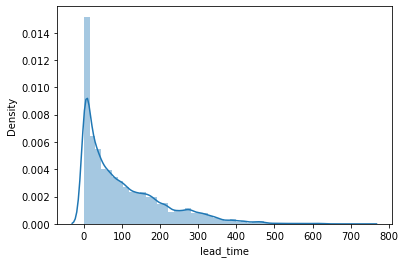

In [42]:
# for lead_time
sns.distplot(dataframe['lead_time'])
plt.show()

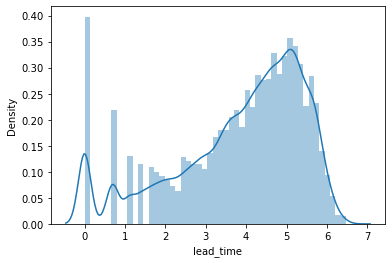

In [43]:
handle_outlier('lead_time')
sns.distplot(dataframe['lead_time'])
plt.show()

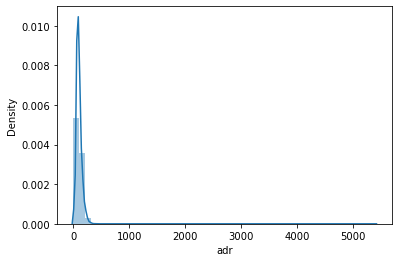

In [44]:
# for adr
sns.distplot(dataframe['adr'])
plt.show()

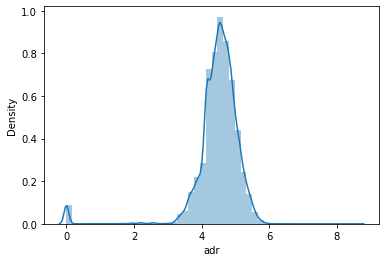

In [45]:
handle_outlier('adr')
sns.distplot(dataframe['adr'].dropna())
plt.show()

In [46]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
adr                               1
required_car_parking_spaces       0
total_of_special_requests   

In [47]:
dataframe.dropna(inplace=True) # drop and update the dataframe

### Divide Data into independent features (X) and dependent feature (y) 

In [48]:
X = dataframe.drop('is_canceled', axis=1) # independent features
y = dataframe['is_canceled'] # dependent feature

In [49]:
print(X.shape)
print(y.shape)

(119209, 27)
(119209,)


### Data Balancing

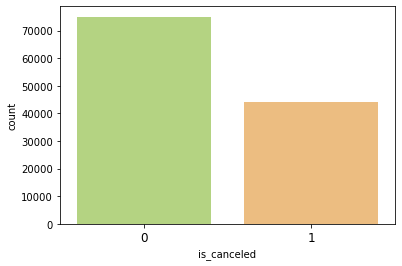

0    75010
1    44199
Name: is_canceled, dtype: int64

In [50]:
sns.countplot(x= "is_canceled", data= dataframe, palette= "RdYlGn_r")

plt.xticks(fontsize = 12)


plt.show()

dataframe["is_canceled"].value_counts()

Here we can see Data is Imbalance

Implement Random Over Sampler for Balancing data

* **Random Over sampling**

In [51]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(random_state= 42)

X_res, y_res = os.fit_resample(X,y)

X_res.shape, y_res.shape

((150020, 27), (150020,))

In [52]:
# Check data is balnce or not
from collections import Counter
print('Original Dataset shape{}'.format(Counter(y)))
print("Resampled datset shape{}".format(Counter(y_res)))

Original Dataset shapeCounter({0: 75010, 1: 44199})
Resampled datset shapeCounter({0: 75010, 1: 75010})


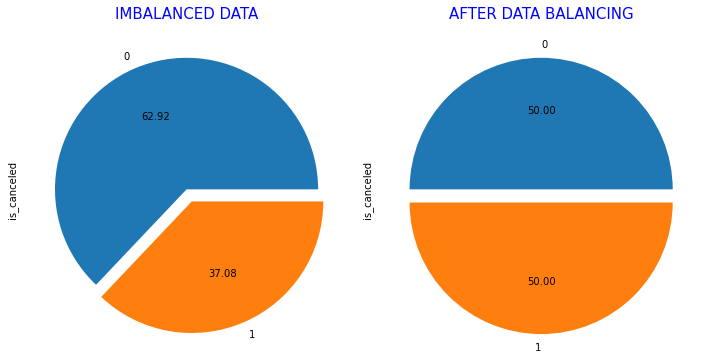

In [53]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title("IMBALANCED DATA", fontsize = 15, c= "b")
dataframe["is_canceled"].value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

plt.subplot(1,2,2)
plt.title("AFTER DATA BALANCING", fontsize = 15, c= "b")
y_res.value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

plt.tight_layout()

### Applying techniques of Feature Importance
To select most important features for ML model

In [54]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [55]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [56]:
feature_sel_model.fit(X_res,y_res)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [57]:
feature_sel_model.get_support() # if a feature is going to contribute or not

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True])

In [58]:
cols = X_res.columns
selected_features = cols[feature_sel_model.get_support()] # using as a filter, feature corresponding to True will be filtered

print('total features: {}'.format(X_res.shape[1]))
print('selected features: {}'.format(len(selected_features)))

total features: 27
selected features: 16


In [59]:
# update x
X_res = X_res[selected_features]
print(X_res.shape)

(150020, 16)


## Model Building

### Import Models 

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**Finding best Random state for building Regression model**

In [61]:
 
# maxAccu=0
# maxRS=0

# for i in range(1, 500):
#    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
#    lr=LogisticRegression(solver='liblinear')
#    lr.fit(X_train, y_train)
#    pred = lr.predict(X_test)
#    accuracy = accuracy_score(y_test, pred)
    
#    if accuracy>maxAccu:
#        maxAccu=accuracy
#        maxRS=i

# print("Best accuracy score is", maxAccu,"on Random State", maxRS) 


### Train Test Split 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=137)
#Train
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)

#Test
print('X_test shape:',X_test.shape)
print('y_test:',y_test.shape)

X_train shape: (105014, 16)
y_train shape: (105014,)
X_test shape: (45006, 16)
y_test: (45006,)


### Logistic Regression

accuracy:-  75.48


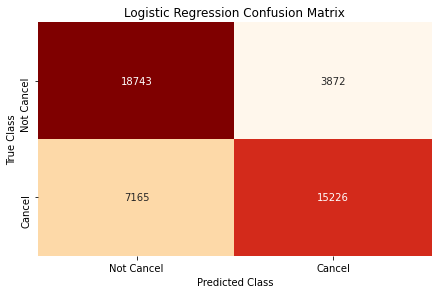

Classification Report:-
              precision    recall  f1-score   support

           0       0.72      0.83      0.77     22615
           1       0.80      0.68      0.73     22391

    accuracy                           0.75     45006
   macro avg       0.76      0.75      0.75     45006
weighted avg       0.76      0.75      0.75     45006



In [63]:
#Logistic Regression Model
lr = LogisticRegression(max_iter=200, solver='liblinear')
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)


# Accuracy test
lr_accuracy = round(accuracy_score(y_test, lr_y_pred) * 100, 2)
print("accuracy:- ", lr_accuracy)


#Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)
classes_names = ['Not Cancel', 'Cancel']
lr_ConfusionMatrix = pd.DataFrame(lr_cm, index=classes_names, columns=classes_names)

sns.heatmap(lr_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Logistic Regression Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, lr_y_pred))

### Decision Tree

accuracy:-  71.99


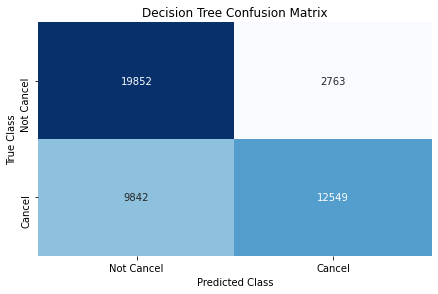

Classification Report:-
              precision    recall  f1-score   support

           0       0.67      0.88      0.76     22615
           1       0.82      0.56      0.67     22391

    accuracy                           0.72     45006
   macro avg       0.74      0.72      0.71     45006
weighted avg       0.74      0.72      0.71     45006



In [64]:
#Decision Tree Model
dtree = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=33) #criterion can be entropy
dtree.fit(X_train, y_train)
dtree_y_pred = dtree.predict(X_test)


# Accuracy test
dtree_accuracy = round(accuracy_score(y_test, dtree_y_pred) * 100, 2)
print("accuracy:- ", dtree_accuracy)


#Confusion Matrix
dtree_cm = confusion_matrix(y_test, dtree_y_pred)
dtree_ConfusionMatrix = pd.DataFrame(dtree_cm, index=classes_names, columns=classes_names)

sns.heatmap(dtree_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, dtree_y_pred))

### Random Forest

accuracy:-  75.32


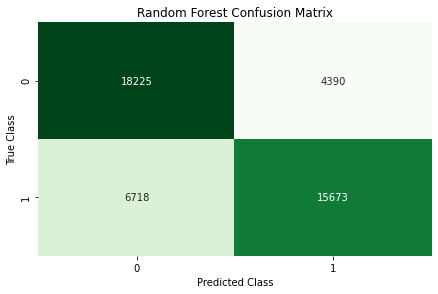

Classification Report:-
              precision    recall  f1-score   support

           0       0.73      0.81      0.77     22615
           1       0.78      0.70      0.74     22391

    accuracy                           0.75     45006
   macro avg       0.76      0.75      0.75     45006
weighted avg       0.76      0.75      0.75     45006



In [65]:
#Random Forest Model
rfc = RandomForestClassifier(criterion = 'gini',n_estimators=200,max_depth=5,random_state=33, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)


# Accuracy test
rfc_accuracy =round(accuracy_score(y_test, rfc_y_pred) * 100, 2)
print("accuracy:- ", rfc_accuracy)


#Confusion Matrix
rfc_cm = confusion_matrix(y_test, rfc_y_pred)
rfc_ConfusionMatrix = pd.DataFrame(rfc_cm, index=classes_names, columns=classes_names)

sns.heatmap(rfc_cm, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, rfc_y_pred))

### Ada Boost Classifier

accuracy:-  79.18


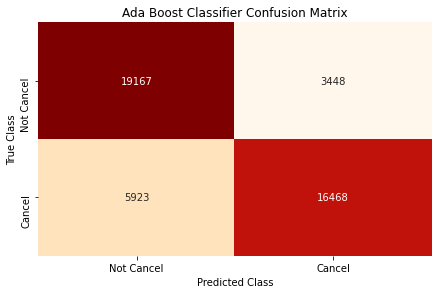

Classification Report:-
              precision    recall  f1-score   support

           0       0.76      0.85      0.80     22615
           1       0.83      0.74      0.78     22391

    accuracy                           0.79     45006
   macro avg       0.80      0.79      0.79     45006
weighted avg       0.80      0.79      0.79     45006



In [66]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
adb_y_pred = adb.predict(X_test)


# Accuracy test
adb_accuracy = round(accuracy_score(y_test, adb_y_pred) * 100, 2)
print("accuracy:- ", adb_accuracy)

#Confusion Matrix
adb_cm = confusion_matrix(y_test, adb_y_pred)
adb_ConfusionMatrix = pd.DataFrame(adb_cm, index=classes_names, columns=classes_names)

sns.heatmap(adb_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Ada Boost Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, adb_y_pred))



### XG Boost Classifier

[13:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy:-  95.45


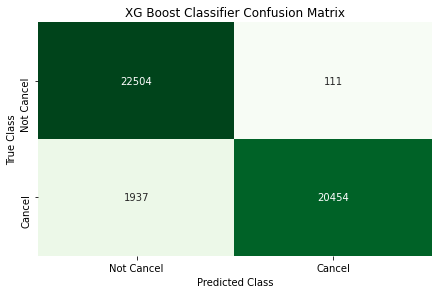

Classification Report:-
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22615
           1       0.99      0.91      0.95     22391

    accuracy                           0.95     45006
   macro avg       0.96      0.95      0.95     45006
weighted avg       0.96      0.95      0.95     45006



In [67]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)


# Accuracy test
xgb_accuracy = round(accuracy_score(y_test, xgb_y_pred) * 100, 2)
print("accuracy:- ", xgb_accuracy)

#Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
xgb_ConfusionMatrix = pd.DataFrame(xgb_cm, index=classes_names, columns=classes_names)

sns.heatmap(xgb_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("XG Boost Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, xgb_y_pred))



### Analysing different models

In [68]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Ada Boost Classifier','XG Boost Classifier'],
    'Accuracy Score': [lr_accuracy, dtree_accuracy, rfc_accuracy, adb_accuracy, xgb_accuracy]})

models.sort_values(['Accuracy Score'], ascending=[False])

,Model,Accuracy Score
4,XG Boost Classifier,95.45
3,Ada Boost Classifier,79.18
0,Logistic Regression,75.48
2,Random Forest,75.32
1,Decision Tree,71.99


### ROC curve

<Figure size 720x504 with 0 Axes>

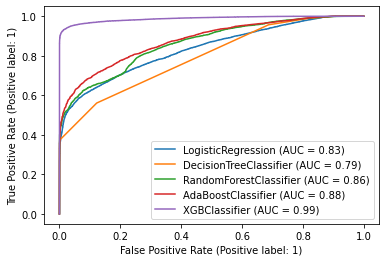

In [69]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(10,7))
fig = plot_roc_curve(lr, X_test, y_test)
fig = plot_roc_curve(dtree, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(rfc, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(adb, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(xgb, X_test, y_test, ax = fig.ax_)

plt.show()

### Precision-Recall Curve (PRC)

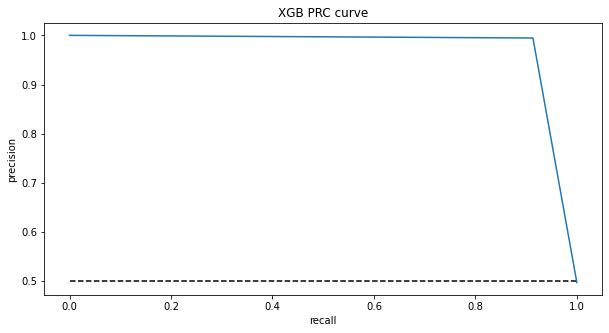

In [70]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, xgb_y_pred)

plt.figure(figsize = (10,5))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('XGB PRC curve')
plt.show()

In [71]:
from sklearn.metrics import auc

# calculate precision-recall AUC
auc_prc = auc(recall, precision)
print(auc_prc)

0.9755666069694746


##  Testing Model

In [72]:
a= np.array(y_test)
predicted = np.array(xgb.predict(X_test))
df_test=pd.DataFrame({"Original":a, "Predicted": predicted}, index= range(len(a)))
df_test.head(50)

,Original,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,1,1


### Conclusion
* We just received 95.10% accuracy in our Hotel Churn Rate Prediction.
* Accuracy of XG Boost Classifier model is 95.10 % 